<a href="https://colab.research.google.com/github/tonyCLN/jaxpcsaft/blob/main/jax_tony_SAFT_test_densities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/tonyCLN/tony_SAFT

Cloning into 'tony_SAFT'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 89 (delta 35), reused 75 (delta 21), pack-reused 0
Unpacking objects: 100% (89/89), done.


In [ ]:
!pip install git+https://github.com/tonyCLN/tony_SAFT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tonyCLN/tony_SAFT to /tmp/pip-req-build-fuxo559x
  Running command git clone -q https://github.com/tonyCLN/tony_SAFT /tmp/pip-req-build-fuxo559x
  Created wheel for tony-saft: filename=tony_saft-0.0.6-py3-none-any.whl size=8987 sha256=994a6b108a928503176ed3effba6f4afa7e3fbaa53bbc5847fc358ca8ff1fa9b
  Stored in directory: /tmp/pip-ephem-wheel-cache-5_sye__n/wheels/40/1d/26/41b2a4437a87604fff0d8d657e3313695d47b045756cc07715
Successfully built tony-saft


In [ ]:
pip install numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.2 MB/s 


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Test Methane

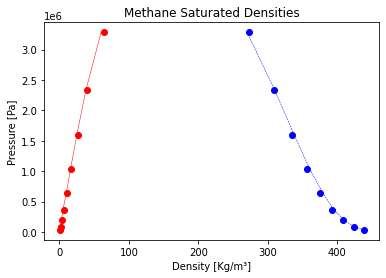

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tony_saft.PC_SAFT import PC_SAFT_EOS as pceos
tab=pd.read_excel('tony_SAFT/tests/dados.xlsx',sheet_name='metano')
T = tab.T.values
densv = tab.densv.values
P = tab.P.values
densl = tab.densl.values

#methane
x = np.asarray([1])
M = np.array([ 16.043]) 
m = np.array([1.])
sigma = np.array([ 3.7039])
epsilon_k =np.array([ 150.03])
eos=pceos(m,sigma,epsilon_k,M)
denslc = P*1
densvc = P*1
for i in range(len(P)):
    denslc[i],densvc[i] = eos.PC_SAFT_massdens(T[0][i],P[i],x)
    
fig = plt.figure()
ax =fig.add_subplot(111)

ax.set_ylabel(r'Pressure [Pa]')
ax.set_xlabel(r'Density [Kg/m³]')
ax.set_title(r'Methane Saturated Densities')
plt.plot(denslc,P,color='b',linewidth=0.5,linestyle='--',alpha=1)
plt.plot(densvc,P,color='r', linewidth=0.5,linestyle='-',alpha=1)
plt.scatter(densv,P,color='r')
plt.scatter(densl,P,color='b')



# Test Butane

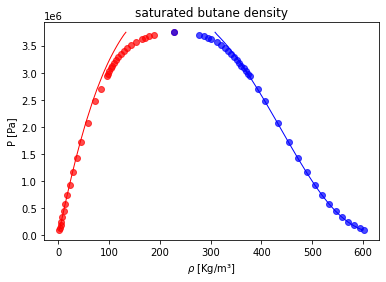

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tony_saft
tab = pd.read_excel('tony_SAFT/tests/dados.xlsx', sheet_name='butano')
T = tab.Temp.values
densv = tab.densv.values
P = tab.P.values
densl = tab.densl.values
P = P/10.0

#butane
x = np.asarray([1])
M = np.array([58.123])
m = np.array([2.3316])
sigma = s = np.array([3.7086])
epsilon_k = e = np.array([222.88])

eos = tony_saft.PC_SAFT.PC_SAFT_EOS(m, sigma, epsilon_k, M)
denslc = P*1
densvc = P*1
for i in range(len(P)):
    denslc[i], densvc[i] = eos.PC_SAFT_massdens(T[i], P[i], x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel(r'P [Pa]')
ax.set_xlabel(r'$\rho$ [Kg/m³]')
ax.set_title(r'saturated butane density')
ax.plot(denslc, P, color='b', linewidth=1, linestyle='-', alpha=1)
ax.plot(densvc, P, color='r', linewidth=1, linestyle='-', alpha=1)
ax.scatter(densv, P, color='r',alpha=0.7)
ax.scatter(densl, P, color='b',alpha=0.7)

#Test Water

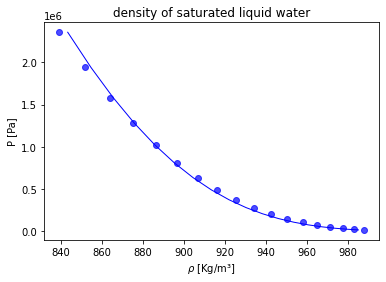

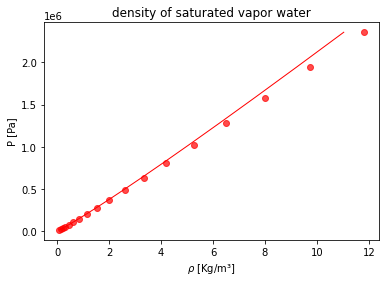

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tony_saft
tab=pd.read_excel('tony_SAFT/tests/dados.xlsx',sheet_name='water')
T = tab.Temp.values
densv = tab.densv.values
P = tab.P.values
P=P+0.0
densl = tab.densl.values
# Binary mixture: water-ethanol
#0 = water, 1 = ethanol

x = np.array([1, 0])
M = np.array([18.015, 46.069 ])
m = np.asarray([1.2047, 2.38267])
s = np.asarray([0,  3.17706])
e = np.asarray([353.95, 198.237])
volAB = np.asarray([0.0451,  0.03238])
eAB  = np.asarray([2425.67,  2653.39])
k_ij = np.asarray([[0, -0.185],
                    [-0.185, 0]])
denslc = P*1
densvc = P*1
for i in range(len(P)):
    t = T[i]
    s[0] = 2.7927 + 10.11*np.exp(-0.01775*t) - 1.417 *np.exp(-0.01146*t)
    eos=tony_saft.PC_SAFT.PC_SAFT_EOS(m,sigma=s,epsilon_k=e,M=M,kbi=k_ij,kAB_k=volAB,eAB_k=eAB,S=np.array([[1, 1],[1, 1]]))
    denslc[i],densvc[i] = eos.PC_SAFT_massdens(T[i],P[i],x,opt=False,method='hybr')

fig = plt.figure()
ax =fig.add_subplot(111)
ax.set_ylabel(r'P [Pa]')
ax.set_xlabel(r'$\rho$ [Kg/m³]')
ax.set_title(r'density of saturated liquid water')
plt.plot(denslc,P,color='b',linewidth=1,linestyle='-',alpha=1)
plt.scatter(densl,P,color='b',alpha=0.7)

fig = plt.figure()
ax =fig.add_subplot(111)
ax.set_title(r'density of saturated vapor water')
ax.set_ylabel(r'P [Pa]')
ax.set_xlabel(r'$\rho$ [Kg/m³]')
plt.plot(densvc,P,color='r', linewidth=1,linestyle='-',alpha=1)
plt.scatter(densv,P,color='r',alpha=0.7)

20744.4

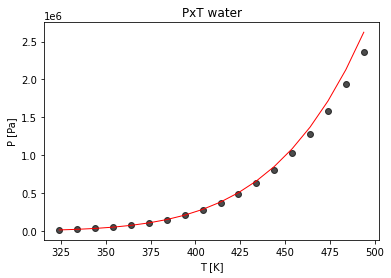

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tony_saft
tab=pd.read_excel('tony_SAFT/tests/dados.xlsx',sheet_name='water')
T = tab.Temp.values
densv = tab.densv.values 
P = tab.P.values
P=P+0.0
# Binary mixture: water-ethanol
#0 = water, 1 = ethanol

x = np.array([1])
M = np.array([18.015])
m = np.asarray([1.20477])
s = np.asarray([0])
e = np.asarray([353.95])
volAB = np.asarray([0.0451])
eAB  = np.asarray([2425.67])
Pcalc = P*1

densv = densv/M[0]*1e+3
for i in range(len(P)):
    t = T[i]
    s[0] = 2.7927 + 10.11*np.exp(-0.01775*t) - 1.417 *np.exp(-0.01146*t)
    eos=tony_saft.PC_SAFT.PC_SAFT_EOS(m,sigma=s,epsilon_k=e,M=M,kbi=k_ij,kAB_k=volAB,eAB_k=eAB,S=np.array([[1],[1]]))
    Pcalc[i] = eos.PC_SAFT_Pressure(densv[i],T[i],x)

fig = plt.figure()
ax =fig.add_subplot(111)
ax.set_ylabel(r'P [Pa]')
ax.set_xlabel(r'T [K]')
ax.set_title(r'PxT water')
plt.plot(T,Pcalc,color='r',linewidth=1,linestyle='-',alpha=1)
plt.scatter(T,P,color='k',alpha=0.7)

#Test Ethanol

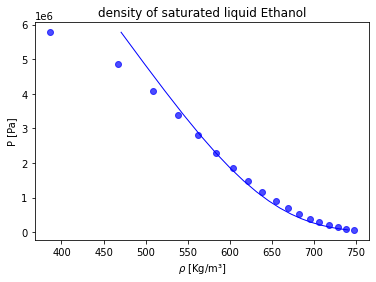

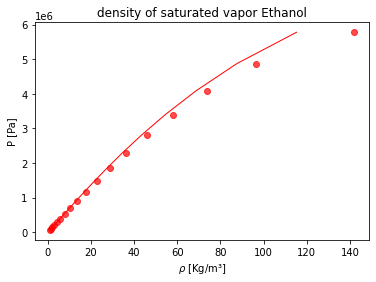

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tony_saft
tab=pd.read_excel('tony_SAFT/tests/dados.xlsx',sheet_name='ethanol')
T = tab.Temp.values
densv = tab.densv.values
P = tab.P.values
P=P+0.0
densl = tab.densl.values

#ethanol

x = np.array([1])
M = np.array([ 46.069 ])
m = np.asarray([ 3.01016])
s = np.asarray([ 2.969])
e = np.asarray([ 236.539])
volAB = np.asarray([  0.04])
eAB  = np.asarray([ 1634.75])
k_ij = np.asarray([[0, 0],
                    [0, 0]])

denslc = P*1
densvc = P*1
for i in range(len(P)):
    t = T[i]
    eos=tony_saft.PC_SAFT.PC_SAFT_EOS(m,sigma=s,epsilon_k=e,M=M,kAB_k=volAB,eAB_k=eAB,S=np.array([[1],[1]]))
    denslc[i],densvc[i] = eos.PC_SAFT_massdens(T[i],P[i],x)

fig = plt.figure()
ax =fig.add_subplot(111)
ax.set_ylabel(r'P [Pa]')
ax.set_xlabel(r'$\rho$ [Kg/m³]')
ax.set_title(r'density of saturated liquid Ethanol')
plt.plot(denslc,P,color='b',linewidth=1,linestyle='-',alpha=1)
plt.scatter(densl,P,color='b',alpha=0.7)

fig = plt.figure()
ax =fig.add_subplot(111)
ax.set_title(r'density of saturated vapor Ethanol')
ax.set_ylabel(r'P [Pa]')
ax.set_xlabel(r'$\rho$ [Kg/m³]')
plt.plot(densvc,P,color='r', linewidth=1,linestyle='-',alpha=1)
plt.scatter(densv,P,color='r',alpha=0.7)

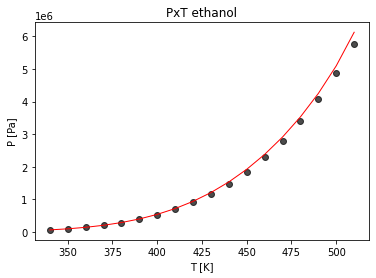

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tony_saft
tab=pd.read_excel('tony_SAFT/tests/dados.xlsx',sheet_name='ethanol')
T = tab.Temp.values
densv = tab.densv.values 
P = tab.P.values
P=P+0.0

#ethanol

x = np.array([1])
M = np.array([ 46.069 ])
m = np.asarray([ 3.01016])
s = np.asarray([ 2.969])
e = np.asarray([ 236.539])
volAB = np.asarray([  0.04])
eAB  = np.asarray([ 1634.75])

Pcalcl = P*1
Pcalcv = P*1

densv = densv/M*1e+3
for i in range(len(P)):
    t = T[i]
    eos=tony_saft.PC_SAFT.PC_SAFT_EOS(m,sigma=s,epsilon_k=e,M=M,kbi=k_ij,kAB_k=volAB,eAB_k=eAB,S=np.array([[1],[1]]))
    Pcalcv[i] = eos.PC_SAFT_Pressure(densv[i],T[i],x)

fig = plt.figure()
ax =fig.add_subplot(111)
ax.set_ylabel(r'P [Pa]')
ax.set_xlabel(r'T [K]')
ax.set_title(r'PxT ethanol')
plt.plot(T,Pcalcv,color='r',linewidth=1,linestyle='-',alpha=1)
plt.scatter(T,P,color='k',alpha=0.7)